# I. Tải và chuẩn hóa dữ liệu

In [9]:
# import thư viện numpy
import numpy as np
# import thư viện matplotlib
import matplotlib.pyplot as plt

# Tải dữ liệu data X và y đã được xử lý thành ma trận
data_X = np.load("F:/UIT/ML/House_Boston/train_X.npy") 
data_y = np.load("F:/UIT/ML/House_Boston/train_y.npy")
data_test_X = np.load("F:/UIT/ML/House_Boston/test_X.npy")
data_test_y = np.load("F:/UIT/ML/House_Boston/test_y.npy")
 
# Chuẩn hóa dữ liệu
def normalizer(dataset):
    # Tìm giá trung bình của mỗi đặc trưng
    mu = np.mean(dataset,axis=0)
    # Tìm độ lệch chuẩn của mỗi đặc trưng
    sigma = np.std(dataset,axis=0)
 
    return(dataset - mu)/sigma

# Thêm cột giá trị bias cho dữ liệu
def bias_vector(features,labels):
    # Lấy số lượng mẫu
    n_training_samples = features.shape[0]
    # Lấy số lượng đặc trưng
    n_dim = features.shape[1]
    # Thêm vào cột bias (cột toàn giá trị 1) cho ma trận thuộc tính
    f = np.reshape(np.c_[np.ones(n_training_samples),features],[n_training_samples,n_dim + 1])
    # Chuyển ma trận nhãn về kích thước Nx1
    l = np.reshape(labels,[n_training_samples,1]) 
    return f, l

train_X = normalizer(data_X)
train_X, train_y = bias_vector(train_X, data_y)

print("Đã tải và chuẩn hóa dữ liệu")

Đã tải và chuẩn hóa dữ liệu


# II. Hàm tính Mean Square Error

In [10]:
def MSE(w, y, X):
    # Tìm kết quả dự đoán (np.dot tương đương phép nhân ma trận)
    predict = np.dot(X, w)
    # Tính mse theo công thức
    mse = np.sum(((y - predict)**2)/X.shape[0])
    return mse

# III. Hàm tính đạo hàm của các tham số

In [11]:
def Derivative(w, y, X):
    # Tìm kết quả dự đoán (np.dot tương đương phép nhân ma trận)
    predict = np.dot(X, w) 
    # Tính ma trận đạo hàm riêng của mỗi tham số trên cost 
    return (-2/X.shape[0])*(np.dot(X.T, y - predict))

# IV. Định nghĩa siêu tham số hyper parameter

In [29]:
# Khởi tạo ma trận biến với giá trị khởi tạo tại mỗi phần tử là 0
w = np.zeros((train_X.shape[1], 1))
# Khởi tạo learning rate
alpha = 0.01

# V. Train dữ liệu và tối ưu bằng BGD

epoch =  0 cost =  555.361302867195
epoch =  50 cost =  91.27844276609994
epoch =  100 cost =  33.158462206005154
epoch =  150 cost =  25.128471585663185
epoch =  200 cost =  23.81758565055716
epoch =  250 cost =  23.471824392209605
epoch =  300 cost =  23.303947329692306
epoch =  350 cost =  23.19336788713583
epoch =  400 cost =  23.113663687564426
epoch =  450 cost =  23.054423335657763
epoch =  500 cost =  23.009585122112604
epoch =  550 cost =  22.97511831374579
epoch =  600 cost =  22.948233612677747
epoch =  650 cost =  22.926967140122958
epoch =  700 cost =  22.909919421568
epoch =  750 cost =  22.896082333248742
epoch =  800 cost =  22.884721851120638
epoch =  850 cost =  22.875297618068274
epoch =  900 cost =  22.86740726288321
epoch =  950 cost =  22.860747559183718
epoch =  1000 cost =  22.855087144067767
epoch =  1050 cost =  22.850247229391044
epoch =  1100 cost =  22.846087873633163
epoch =  1150 cost =  22.84249814407317
epoch =  1200 cost =  22.839389015214458
epoch =  

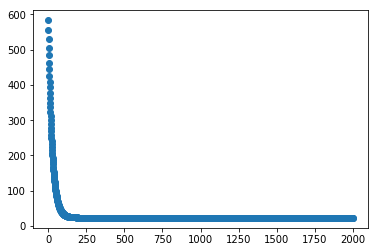

In [15]:
all_mse = []

# Khởi tạo số vòng lặp
num = 2000
# Huấn luyện
for i in range(num):
    # Tính cost với w hiện thời
    err = MSE(w, train_y, train_X)
    all_mse.append(err)
    
    # Cập nhật w theo công thức gradient descent
    w = w - alpha*Derivative(w, train_y, train_X)
    
    if i % 50 == 0:
        # In ra cost tại vòng lặp thứ i
        print("epoch = ", i, "cost = ",MSE(w, train_y, train_X))

print("epoch = ", i, "cost = ",MSE(w, train_y, train_X))
        
# Vẽ đồ thị biễu diễn cost qua từng vòng lặp
axis_x = list(range(num))
axis_y = all_mse
plt.scatter(axis_x, axis_y)
plt.show()

# VI. Kiểm tra model được train và tối ưu bằng BGD

In [16]:
# Tải dữ liệu data X và y đã được xử lý thành ma trận
data_test_X = np.load("F:/UIT/ML/House_Boston/test_X.npy")
data_test_y = np.load("F:/UIT/ML/House_Boston/test_y.npy")


test_X = normalizer(data_test_X)
test_X, test_y = bias_vector(test_X, data_test_y)

print("MSE trên test : ", MSE(w, test_y, test_X))

MSE trên test :  21.99356717495397


# VII. Train dữ liệu và tối ưu bằng SGD

epoch =  0 cost =  583.5563392857143
epoch =  20 cost =  26.640699478489264
epoch =  40 cost =  26.640856976438652
epoch =  60 cost =  26.640857010946
epoch =  80 cost =  26.640857010953557
epoch =  100 cost =  26.640857010953557
epoch =  120 cost =  26.640857010953557
epoch =  140 cost =  26.640857010953553
epoch =  160 cost =  26.640857010953553
epoch =  180 cost =  26.64085701095356
epoch =  200 cost =  26.640857010953546
epoch =  220 cost =  26.640857010953564
epoch =  240 cost =  26.640857010953564
epoch =  260 cost =  26.64085701095356
epoch =  280 cost =  26.64085701095356
epoch =  300 cost =  26.640857010953564
epoch =  320 cost =  26.64085701095356
epoch =  340 cost =  26.640857010953557
epoch =  360 cost =  26.64085701095356
epoch =  380 cost =  26.640857010953553
epoch =  399 cost =  26.640857010953557


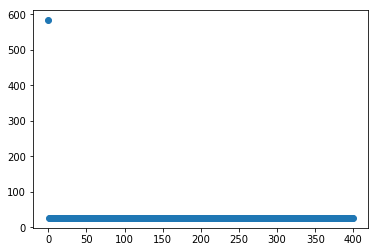

In [24]:
# list chứa tất cả mse
all_mse = []

# Khởi tạo số vòng lặp
num = 400
# Huấn luyện
for i in range(num):
    # Tính cost với w hiện thời
    err = MSE(w, train_y, train_X)
    all_mse.append(err)
    
    if i % 20 == 0:
        # In ra cost tại vòng lặp thứ i
        print("epoch = ", i, "cost = ",MSE(w, train_y, train_X))
    
    # Duyệt qua mỗi điểm dữ trên tập train
    for j in range(train_X.shape[0]):
        # Cập nhật w theo công thức gradient descent
        w = w - alpha*Derivative(w, train_y[j].reshape(1, 1), train_X[j].reshape(1, train_X.shape[1]))

print("epoch = ", i, "cost = ",MSE(w, train_y, train_X))
        
# Vẽ đồ thị biễu diễn cost qua từng vòng lặp
axis_x = list(range(num))
axis_y = all_mse
plt.scatter(axis_x, axis_y)
plt.show()

# VIII. Kiểm tra model được train và tối ưu bằng SGD

In [25]:
# Tải dữ liệu data X và y đã được xử lý thành ma trận
data_test_X = np.load("F:/UIT/ML/House_Boston/test_X.npy")
data_test_y = np.load("F:/UIT/ML/House_Boston/test_y.npy")


test_X = normalizer(data_test_X)
test_X, test_y = bias_vector(test_X, data_test_y)

print("MSE trên test : ", MSE(w, test_y, test_X))

MSE trên test :  22.991636216766025


# IX. Train dữ liệu và tối ưu bằng mini-BGD

epoch =  0 cost =  583.5563392857143
epoch =  20 cost =  44.91136888443711
epoch =  40 cost =  24.695061319561262
epoch =  60 cost =  23.519376145563882
epoch =  80 cost =  23.254250492521003
epoch =  100 cost =  23.11278295160363
epoch =  120 cost =  23.02528543770717
epoch =  140 cost =  22.968551633080743
epoch =  160 cost =  22.930339894245396
epoch =  180 cost =  22.903683293585985
epoch =  200 cost =  22.884488143334032
epoch =  220 cost =  22.870280595270863
epoch =  240 cost =  22.85952159833896
epoch =  260 cost =  22.851223572840173
epoch =  280 cost =  22.84473192571776
epoch =  300 cost =  22.83959834729183
epoch =  320 cost =  22.835505988942845
epoch =  340 cost =  22.83222437648614
epoch =  360 cost =  22.82958160977659
epoch =  380 cost =  22.82744676920794
epoch =  399 cost =  22.82571845764432


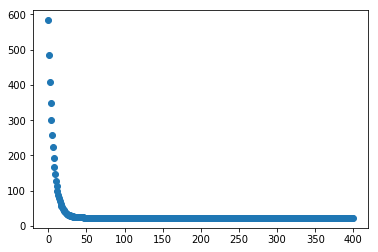

In [30]:
# list chứa tất cả mse
all_mse = []

# Thiết lập batch size
batch_size = 84

# Khởi tạo số vòng lặp
num = 400
# Huấn luyện
for i in range(num):
    # Tính cost với w hiện thời
    err = MSE(w, train_y, train_X)
    all_mse.append(err)
    
    if i % 20 == 0:
        # In ra cost tại vòng lặp thứ i
        print("epoch = ", i, "cost = ",MSE(w, train_y, train_X))
    
    # Duyệt qua từng khối dữ liệu được chia nhỏ với kích thước batch_size
    for j in range(0, train_X.shape[0], batch_size):
        # Cập nhật w theo công thức gradient descent
        w = w - alpha*Derivative(w, train_y[j:j+batch_size].reshape(batch_size, 1), train_X[j:j+batch_size].reshape(batch_size, train_X.shape[1]))

print("epoch = ", i, "cost = ",MSE(w, train_y, train_X))
        
# Vẽ đồ thị biễu diễn cost qua từng vòng lặp
axis_x = list(range(num))
axis_y = all_mse
plt.scatter(axis_x, axis_y)
plt.show()

# X. Kiểm tra model được train và tối ưu bằng mini-BGD

In [31]:
# Tải dữ liệu data X và y đã được xử lý thành ma trận
data_test_X = np.load("F:/UIT/ML/House_Boston/test_X.npy")
data_test_y = np.load("F:/UIT/ML/House_Boston/test_y.npy")


test_X = normalizer(data_test_X)
test_X, test_y = bias_vector(test_X, data_test_y)

print("MSE trên test : ", MSE(w, test_y, test_X))

MSE trên test :  22.004942482164346
